In [1]:
!pip install pandas
!pip install numpy


In [2]:
!pip install scikit-learn


In [ ]:
pip install --upgrade pip


In [7]:
!pip uninstall tensorflow --yes --no-cache-dir

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0


In [2]:
!pip install tensorflow==2.17 --no-cache-dir


In [3]:
!pip install tensorflow==2.17 -i https://pypi.org/simple --no-cache-dir


In [6]:
import tensorflow as tf
print(tf.__version__)  # Should print 2.17 or 2.18


2.17.0


In [8]:
!pip install shap
!pip install openpyxl


In [10]:
import os
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tempfile
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, Callback
import openpyxl
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset (make sure the path is correct)
data_path = 'C:/Users/Hp/3.2final_dataset.csv'  # Update the path if necessary
df = pd.read_csv(data_path)

# Check the first few rows to understand the data
print(df.head())

# Preprocessing: Encode labels and scale features
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])  # Encode labels (e.g., 'DDoS', 'DoS')

# Select the feature columns (these are the numerical columns you want to use for training)
selected_columns = ['flow_duration', 'Header_Length', 'Protocol Type', 'Rate', 'Srate', 'Drate']
X = df[selected_columns]  # Feature columns

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# The target variable (labels)
y = df['label_encoded']  # This contains the categories like 'DDoS', 'DoS', etc.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


   flow_duration  Header_Length  Protocol Type  Duration       Rate  \
0       0.000000          53.46           5.94     63.36   1.987111   
1       0.000000          54.00           6.00     64.00  14.278069   
2       0.027766         319.40          16.72     63.19  13.601604   
3       0.000000          54.00           6.00     64.00  25.874235   
4       1.013515         120.42           6.00     64.00   1.615817   

       Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0   1.987111    0.0              1.0              0.0              1.0  ...   
1  14.278069    0.0              0.0              0.0              0.0  ...   
2  13.601604    0.0              0.0              0.0              0.0  ...   
3  25.874235    0.0              0.0              1.0              0.0  ...   
4   1.615817    0.0              0.0              1.0              0.0  ...   

        Std  Tot size           IAT  Number   Magnitue    Radius  Covariance  \
0  0.273154     54

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the ANN model
def create_model(input_dim, num_classes):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(X_train.shape[1], len(label_encoder.classes_))

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.4062 - loss: 1.5717 - val_accuracy: 0.4845 - val_loss: 1.2489
Epoch 2/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4883 - loss: 1.2838 - val_accuracy: 0.5194 - val_loss: 1.2081
Epoch 3/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5004 - loss: 1.2532 - val_accuracy: 0.5202 - val_loss: 1.2022
Epoch 4/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5019 - loss: 1.2489 - val_accuracy: 0.5222 - val_loss: 1.1995
Epoch 5/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5036 - loss: 1.2461 - val_accuracy: 0.5196 - val_loss: 1.2094
Epoch 6/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5018 - loss: 1.2482 - val_accuracy: 0.5209 - val_loss: 1.2046
Epoch 7/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.5007 - loss: 1.2595 - val_accuracy: 0.5100 - val_loss: 1.2174
Epoch 8/10
11226/11226 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 

In [9]:
# Check the keys available in the training history
print(history.history.keys())  # This should now include 'val_accuracy' and 'val_loss'


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


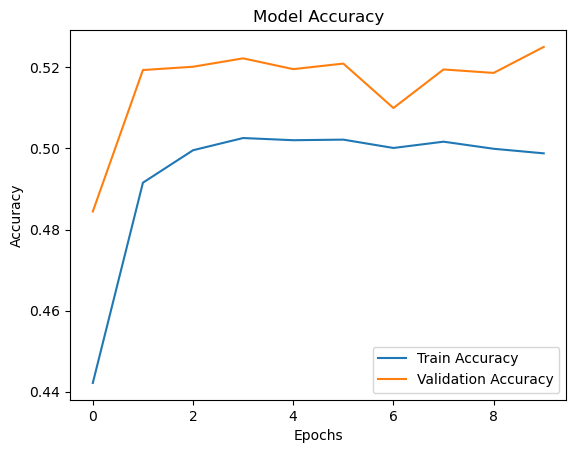

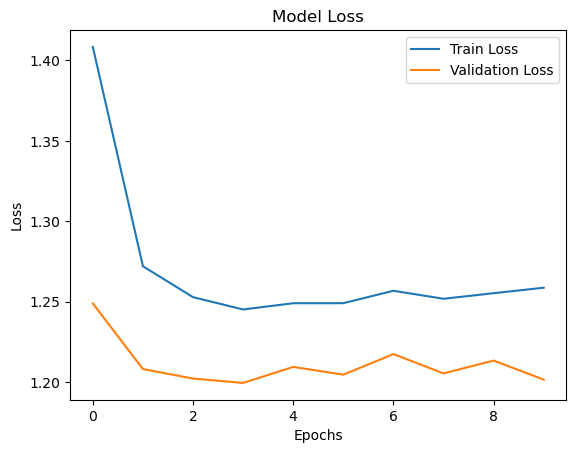

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
import numpy as np  # Make sure numpy is imported

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the global model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Use np.argmax to get the predicted class labels

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_classes, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_classes, average='macro', zero_division=0)

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Save the results to a CSV
metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv('federated_model_metrics.csv', index=False)
print("Metrics saved to federated_model_metrics.csv")


2807/2807 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step
Test Accuracy: 0.5251
Test Precision: 0.2620
Test Recall: 0.2508
Test F1 Score: 0.2273
Metrics saved to federated_model_metrics.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


IndexError: index 6 is out of bounds for axis 1 with size 6

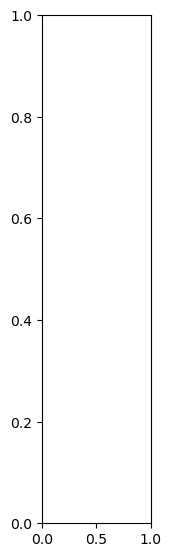

In [15]:
import shap

# Select a small sample from the test set for SHAP analysis
X_test_sample = X_test[:300]  # Select 300 samples for faster computation

# Initialize SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_test_sample)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns, show=True)


In [19]:
# implementation of SVM,Regression,Random Forest and KNN Model



# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd


Logistic Regression - Accuracy: 0.8395, Precision: 0.6636, Recall: 0.5275, F1 Score: 0.5474
SVM - Accuracy: 0.8170, Precision: 0.6549, Recall: 0.5565, F1 Score: 0.5626
Random Forest - Accuracy: 0.9923, Precision: 0.7875, Recall: 0.7201, F1 Score: 0.7349
KNN - Accuracy: 0.9426, Precision: 0.6669, Recall: 0.6304, F1 Score: 0.6419


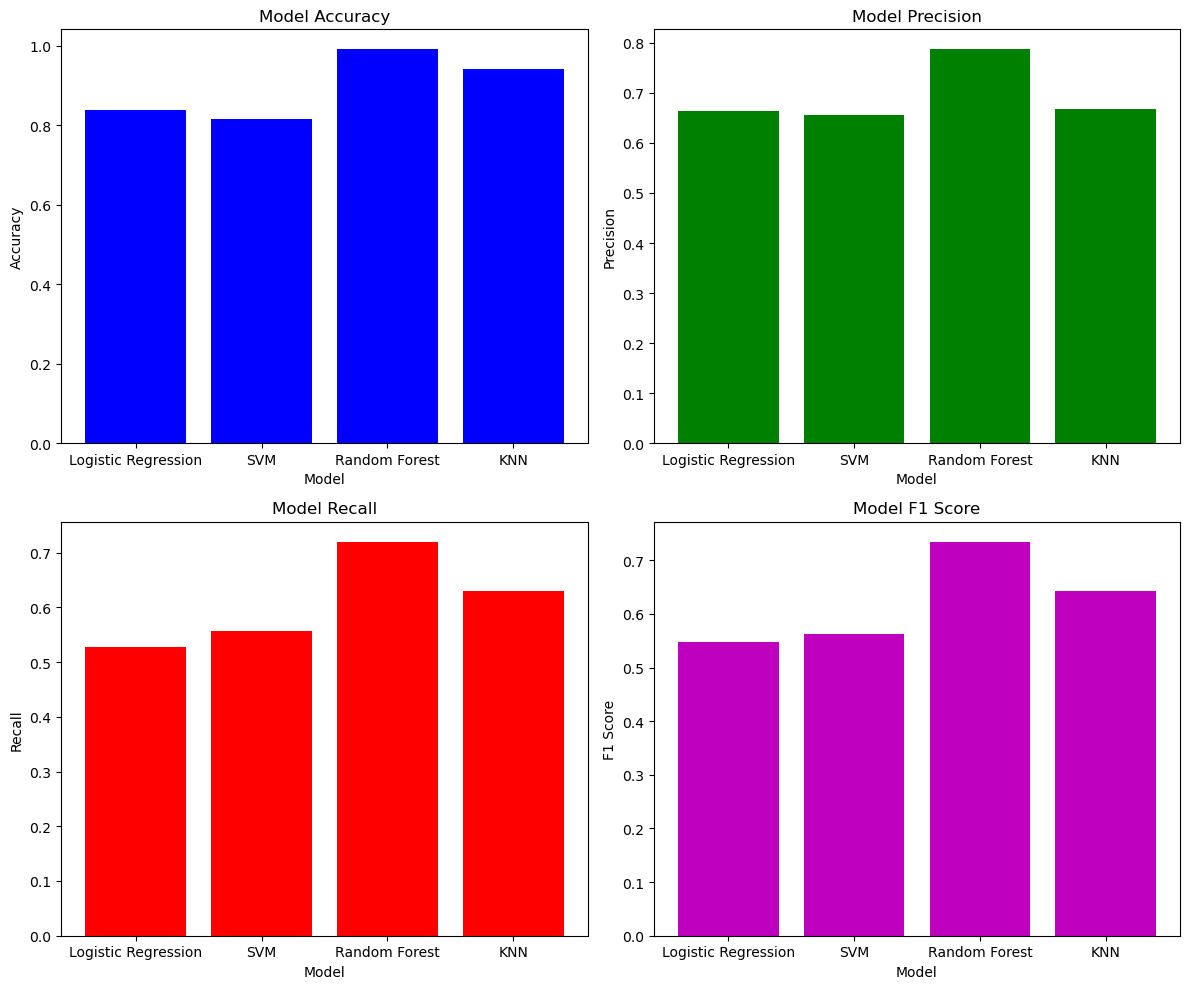

In [3]:
# Step 1: Import Necessary Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the Dataset
# Load the dataset
df = pd.read_csv('C:/Users/Hp/3.2final_dataset.csv')  # Make sure to change the path

# Preprocess the dataset
X = df.drop('label', axis=1)  # Features (exclude the label column)
y = df['label']  # Target variable (the label column)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 3: Define a Function to Evaluate Models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    return accuracy, precision, recall, f1

# Step 4: Train and Evaluate Different Models

# 4.1 Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(lr_model, X_test, y_test)
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1 Score: {lr_f1:.4f}")

# 4.2 Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test, y_test)
print(f"SVM - Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1 Score: {svm_f1:.4f}")

# 4.3 Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

# 4.4 K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(knn_model, X_test, y_test)
print(f"KNN - Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1 Score: {knn_f1:.4f}")

# Step 5: Visualize Model Performance
# Store the results in a list
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy, knn_accuracy]
precisions = [lr_precision, svm_precision, rf_precision, knn_precision]
recalls = [lr_recall, svm_recall, rf_recall, knn_recall]
f1_scores = [lr_f1, svm_f1, rf_f1, knn_f1]

# Plotting the accuracy, precision, recall, and F1 Score for comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Accuracy
axes[0, 0].bar(model_names, accuracies, color='b')
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')

# Plot Precision
axes[0, 1].bar(model_names, precisions, color='g')
axes[0, 1].set_title('Model Precision')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision')

# Plot Recall
axes[1, 0].bar(model_names, recalls, color='r')
axes[1, 0].set_title('Model Recall')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Recall')

# Plot F1 Score
axes[1, 1].bar(model_names, f1_scores, color='m')
axes[1, 1].set_title('Model F1 Score')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
print(tf.__version__)


2.17.0
